### Import Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re 

In [4]:
url = 'https://raw.githubusercontent.com/sami12rom/Titanic/master/train.csv'
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data=data.loc[:,data.columns != 'Name']
data=data.loc[:,data.columns != 'Cabin']

data['Age'].fillna(data['Age'].median(), inplace=True)
data=data.dropna(subset=['Embarked'],axis=0)


data['Sex'] = data['Sex'].replace(['male','female'],[1,0])

new = data['Ticket'].str.split('\s+',1)
data['Ticket'] = [x[1] if len(x) > 1 else x[0] for x in new]


In [6]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,21171,7.2500,S
1,2,1,1,0,38.0,1,0,17599,71.2833,C
2,3,1,3,0,26.0,0,0,3101282,7.9250,S
3,4,1,1,0,35.0,1,0,113803,53.1000,S
4,5,0,3,1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,S
887,888,1,1,0,19.0,0,0,112053,30.0000,S
888,889,0,3,0,28.0,1,2,6607,23.4500,S
889,890,1,1,1,26.0,0,0,111369,30.0000,C


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 69.5+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,0.477538,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [7]:
new= data['Ticket'].str.split('\s+',1)
new1 = [x[1] if len(x) > 1 else x for x in new]
#new2 = [str(x).replace('[','') for x in new1]
#new3 = [str(x).replace(']','') for x in new2]
#new['3']=[x for x in new[1] if x = 'None']
#new['3']=[x for x in new[1] if x !='None']
new2 = [str(x).replace('[','') for x in new1]
new3 = [str(x).replace(']','') for x in new2]
new4 = [int(x) for x in new3]
new3

ValueError: invalid literal for int() with base 10: "'21171'"

In [8]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,21171,7.2500,S
1,2,1,1,0,38.0,1,0,17599,71.2833,C
2,3,1,3,0,26.0,0,0,3101282,7.9250,S
3,4,1,1,0,35.0,1,0,113803,53.1000,S
4,5,0,3,1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,211536,13.0000,S
887,888,1,1,0,19.0,0,0,112053,30.0000,S
888,889,0,3,0,28.0,1,2,6607,23.4500,S
889,890,1,1,1,26.0,0,0,111369,30.0000,C


<BarContainer object of 1 artists>

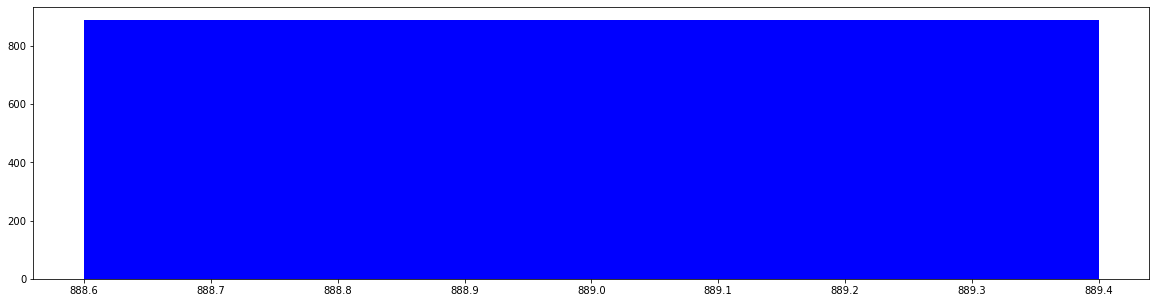

In [9]:
plt.figure(figsize=(20,5))
plt.bar(data['Embarked'].count(),data['Embarked'].count(),color = 'blue')


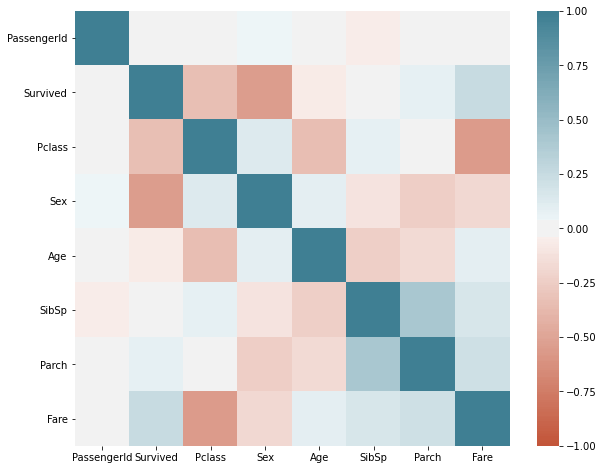

In [10]:
fig = plt.subplots(figsize=(10,8))
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1,center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

In [1]:
x = 2

In [2]:
x

2